In [2]:
import pandas as pd

# Load the data
data_path = 'ForestFireDataset_PeninsularMalaysia_Filtered.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the data
data.head()

,system:index,current_aet_annual,current_def_annual,current_pdsi_annual,current_pet_annual,current_pr_annual,current_ro_annual,current_soil_annual,current_srad_annual,current_swe_annual,...,ADM0_EN,ADM1_EN,ADM2_EN,validOn,Shape_Area,ADM0_PCODE,BurnDate,year,month,day
0,1_2001_09_01_00000000000000000071_0,107.900000,1.591667,1.225000,109.483333,296.416667,188.666667,111.983333,188.691667,0.0,...,Malaysia,Johor,Segamat,1613030400000,0.233776,MY,270,2001,9,27
1,1_2001_09_01_00000000000000000071_1,107.900000,1.591667,1.225000,109.483333,296.416667,188.666667,111.983333,188.691667,0.0,...,Malaysia,Johor,Segamat,1613030400000,0.233776,MY,256,2001,9,13
2,1_2001_09_01_00000000000000000014_0,107.300000,1.483333,1.194167,108.791667,294.416667,187.166667,111.141667,187.225000,0.0,...,Malaysia,Terengganu,Dungun,1613030400000,0.219613,MY,264,2001,9,21
3,1_2001_09_01_00000000000000000014_1,107.300000,1.483333,1.194167,108.791667,294.416667,187.166667,111.141667,187.225000,0.0,...,Malaysia,Terengganu,Dungun,1613030400000,0.219613,MY,264,2001,9,21
4,1_2001_09_01_00000000000000000014_2,100.983333,0.916667,1.966667,101.900000,204.416667,103.333333,86.308333,173.558333,0.0,...,Malaysia,Terengganu,Dungun,1613030400000,0.219613,MY,257,2001,9,14


In [3]:
# Analyzing the dataset

# Number of columns and rows
num_rows, num_cols = data.shape

# Displaying all the columns
columns = data.columns.tolist()

num_rows, num_cols, columns

(11083,
 40,
 ['system:index',
  'current_aet_annual',
  'current_def_annual',
  'current_pdsi_annual',
  'current_pet_annual',
  'current_pr_annual',
  'current_ro_annual',
  'current_soil_annual',
  'current_srad_annual',
  'current_swe_annual',
  'current_tmmn_annual',
  'current_tmmx_annual',
  'current_vap_annual',
  'current_vpd_annual',
  'current_vs_annual',
  'current_EVI_annual',
  'current_NDVI_annual',
  'current_LST_annual',
  'current_KBDI_annual',
  'current0101_LC_Type2_annual',
  'current0101_LC_Type2_annual_classname',
  'current0101_hii_annual',
  'current0101_average_annual_nighttime',
  'longitude',
  'latitude',
  'fire',
  'date',
  'ADM1_PCODE',
  'ADM2_PCODE',
  'Shape_Leng',
  'ADM0_EN',
  'ADM1_EN',
  'ADM2_EN',
  'validOn',
  'Shape_Area',
  'ADM0_PCODE',
  'BurnDate',
  'year',
  'month',
  'day'])

In [4]:
# Excluding specified columns from the dataset
exclude_columns = ['date', 'year', 'month', 'day', 'longitude', 'latitude', 'ADM0_PCODE', 'ADM1_PCODE', 'ADM2_PCODE', 'Shape_Leng', 'Shape_Area', 'system:index', 'validOn']
data = data.drop(columns=exclude_columns)

# Checking for missing values
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Displaying columns with missing values and their percentage
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)
missing_data

,Missing Values,Percentage (%)
current0101_average_annual_nighttime,9123,82.315258
current0101_hii_annual,5680,51.249662
current_KBDI_annual,2153,19.426148
current_LST_annual,51,0.460164
current_EVI_annual,4,0.036091
current_NDVI_annual,4,0.036091


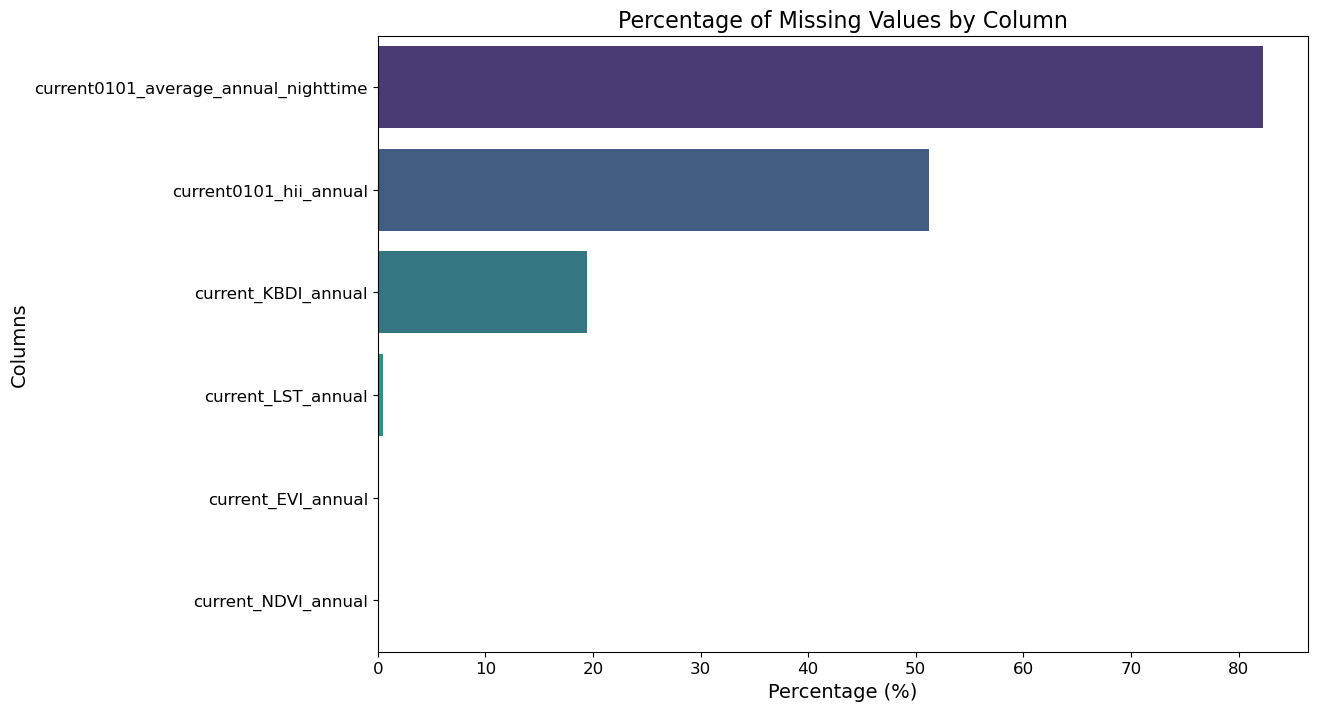

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_data['Percentage (%)'], y=missing_data.index, palette='viridis')
plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Columns', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

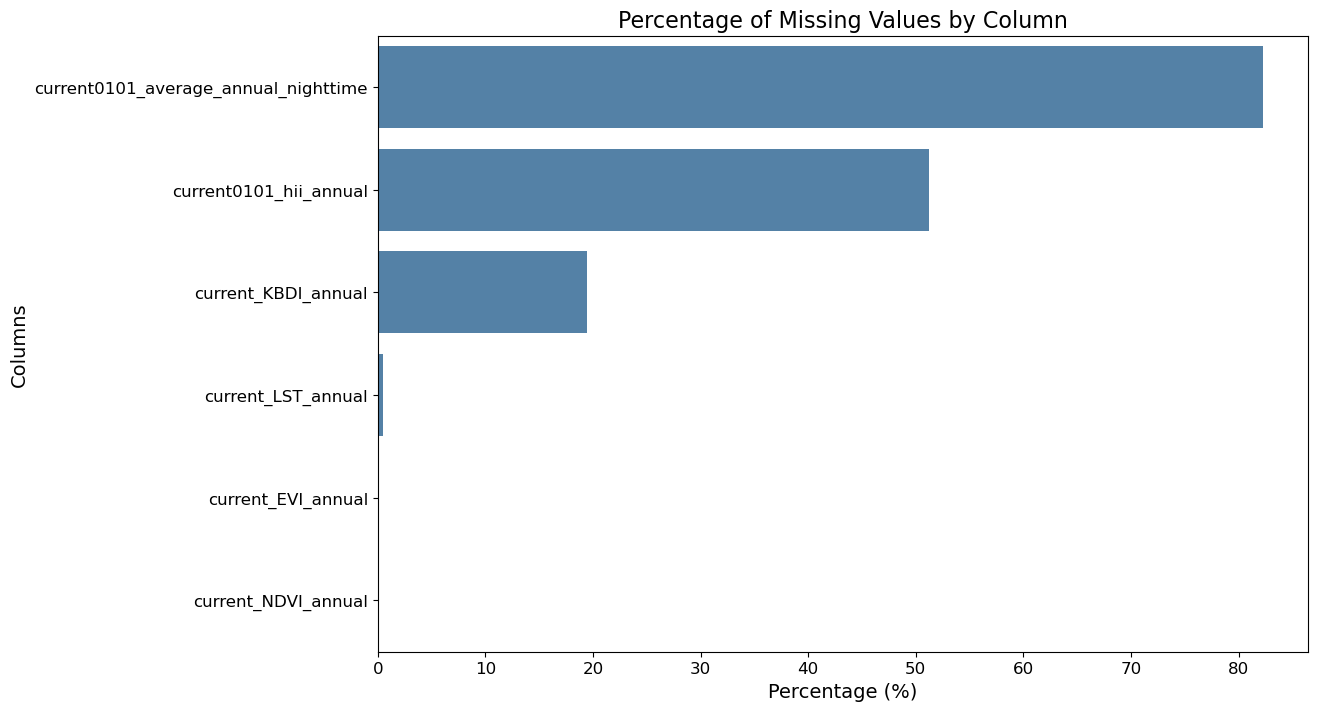

In [6]:
# Redrawing the plot with the specified color 'steelblue'
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_data['Percentage (%)'], y=missing_data.index, color='steelblue')
plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Columns', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

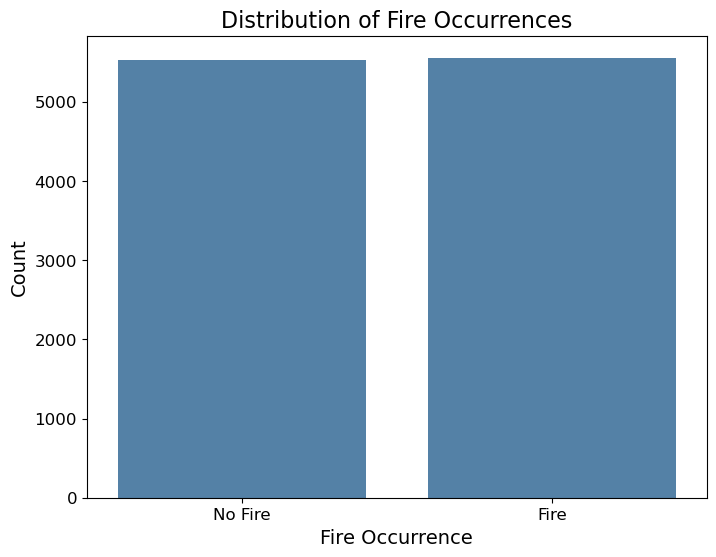

1    50.139854
0    49.860146
Name: fire, dtype: float64

In [7]:
# Exploring the distribution of key variables with respect to the 'fire' column

# Distribution of 'fire' column
fire_distribution = data['fire'].value_counts(normalize=True) * 100

# Visualizing the distribution of 'fire' column
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='fire', color='steelblue')
plt.title('Distribution of Fire Occurrences', fontsize=16)
plt.xlabel('Fire Occurrence', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Fire', 'Fire'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

fire_distribution

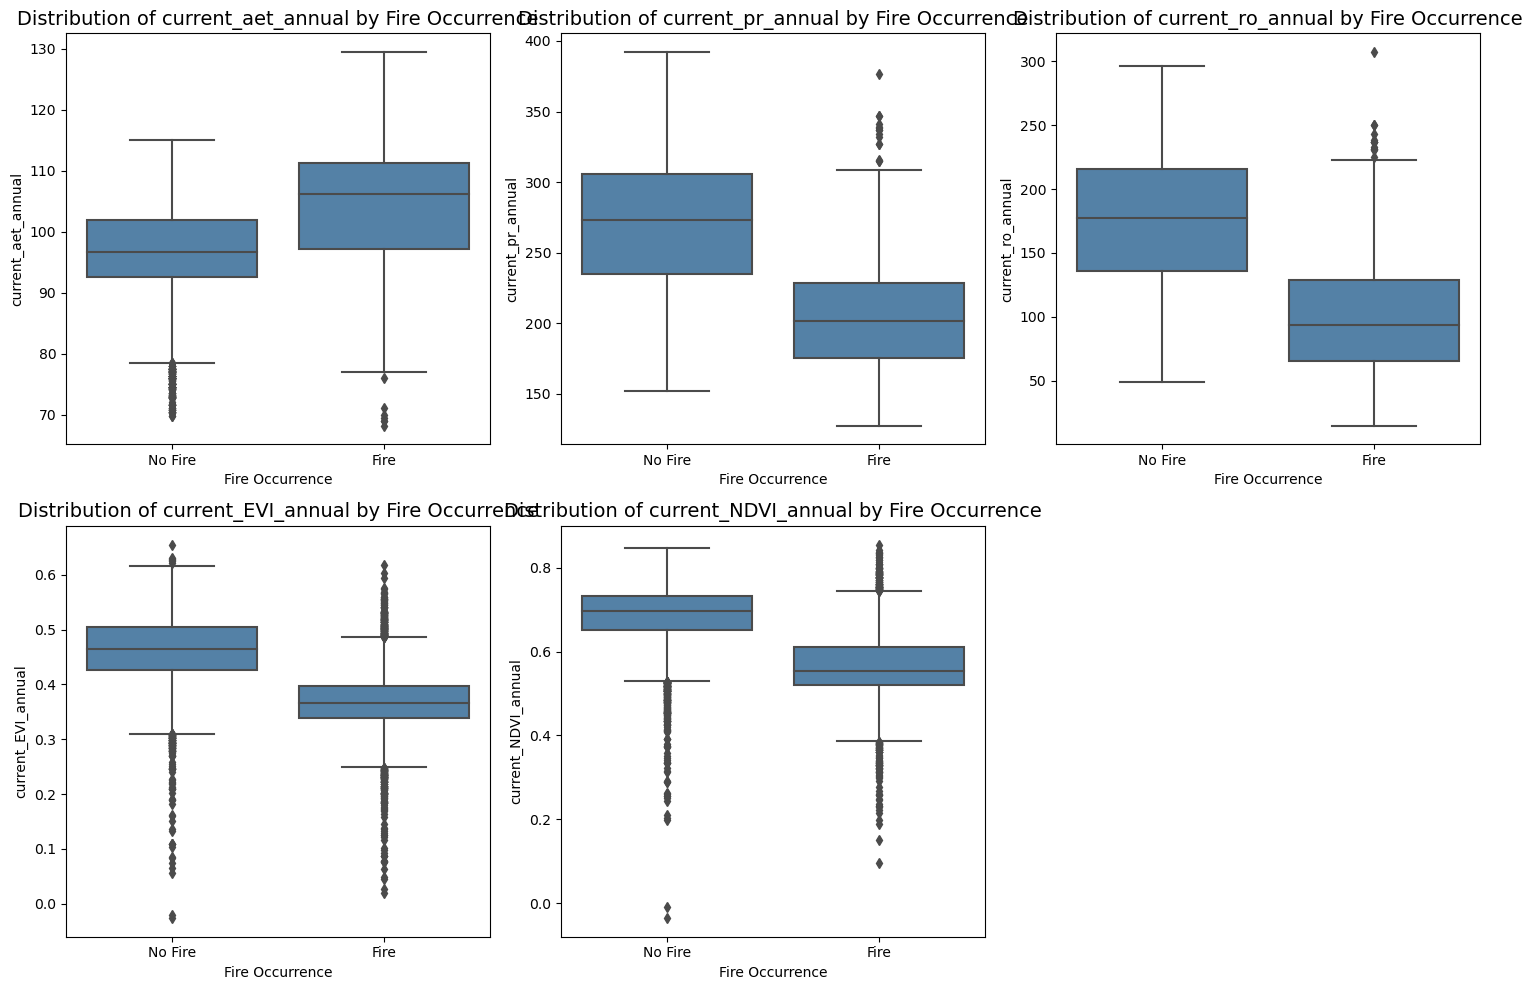

In [8]:
# Selecting a few key variables to visualize their relationship with the 'fire' column
key_variables = ['current_aet_annual', 'current_pr_annual', 'current_ro_annual', 'current_EVI_annual', 'current_NDVI_annual']

# Plotting boxplots for these variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(key_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, x='fire', y=var, color='steelblue')
    plt.title(f'Distribution of {var} by Fire Occurrence', fontsize=14)
    plt.xlabel('Fire Occurrence')
    plt.ylabel(var)
    plt.xticks(ticks=[0, 1], labels=['No Fire', 'Fire'])
plt.tight_layout()
plt.show()

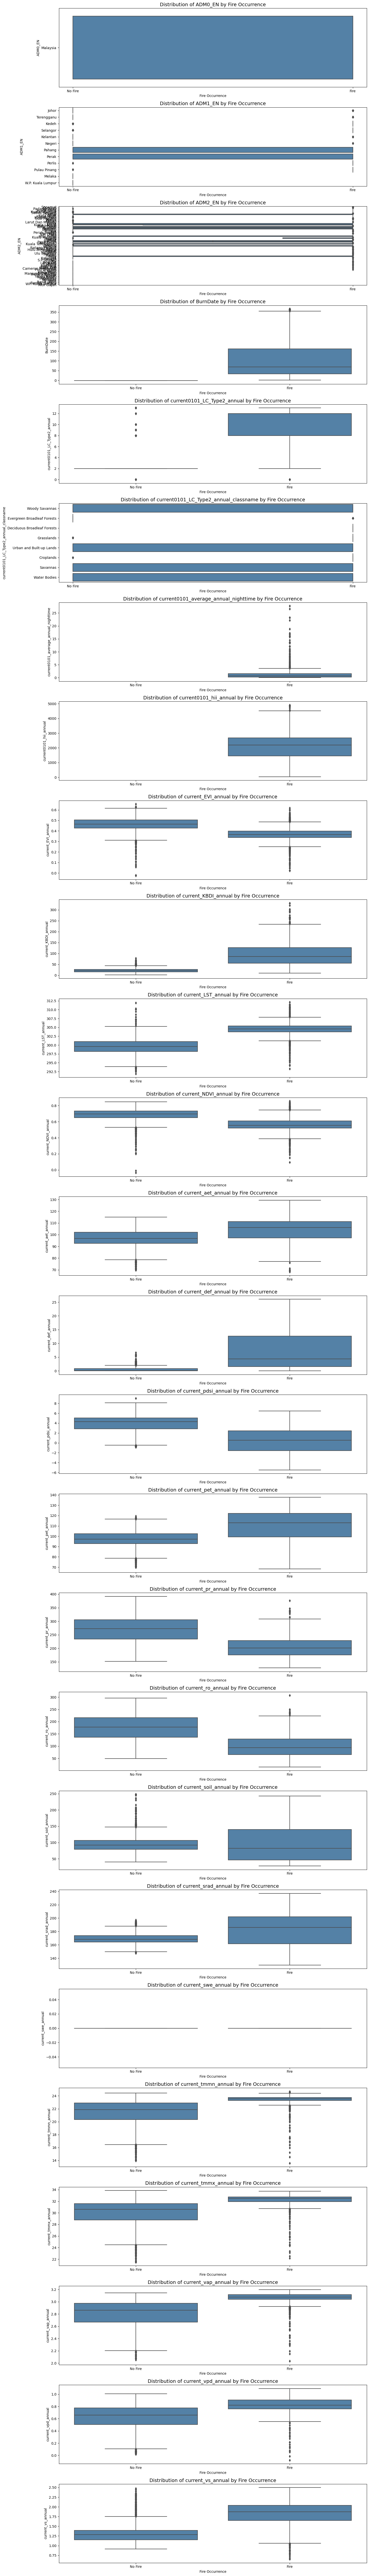

In [9]:
# Plotting boxplots for all variables in the dataset with respect to the 'fire' column
all_variables = data.columns.difference(['fire'])
num_vars = len(all_variables)

plt.figure(figsize=(15, 4 * num_vars))
for i, var in enumerate(all_variables, 1):
    plt.subplot(num_vars, 1, i)
    sns.boxplot(data=data, x='fire', y=var, color='steelblue')
    plt.title(f'Distribution of {var} by Fire Occurrence', fontsize=14)
    plt.xlabel('Fire Occurrence')
    plt.ylabel(var)
    plt.xticks(ticks=[0, 1], labels=['No Fire', 'Fire'])
plt.tight_layout()
plt.show()

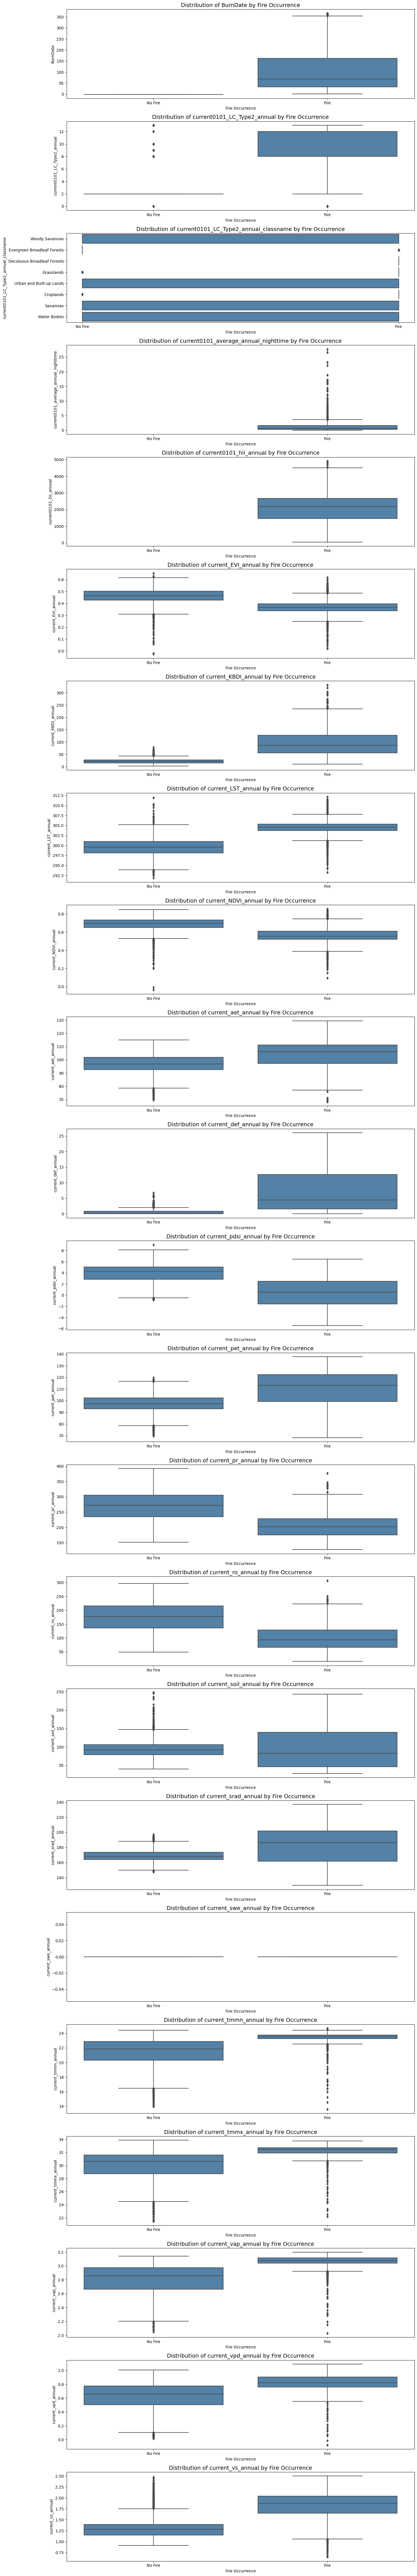

In [10]:
# Excluding administrative boundaries from the list of variables
exclude_admin = ['ADM0_EN', 'ADM1_EN', 'ADM2_EN']
variables_without_admin = [var for var in all_variables if var not in exclude_admin]

# Plotting boxplots for the variables without administrative boundaries
plt.figure(figsize=(15, 4 * len(variables_without_admin)))
for i, var in enumerate(variables_without_admin, 1):
    plt.subplot(len(variables_without_admin), 1, i)
    sns.boxplot(data=data, x='fire', y=var, color='steelblue')
    plt.title(f'Distribution of {var} by Fire Occurrence', fontsize=14)
    plt.xlabel('Fire Occurrence')
    plt.ylabel(var)
    plt.xticks(ticks=[0, 1], labels=['No Fire', 'Fire'])
plt.tight_layout()
plt.show()

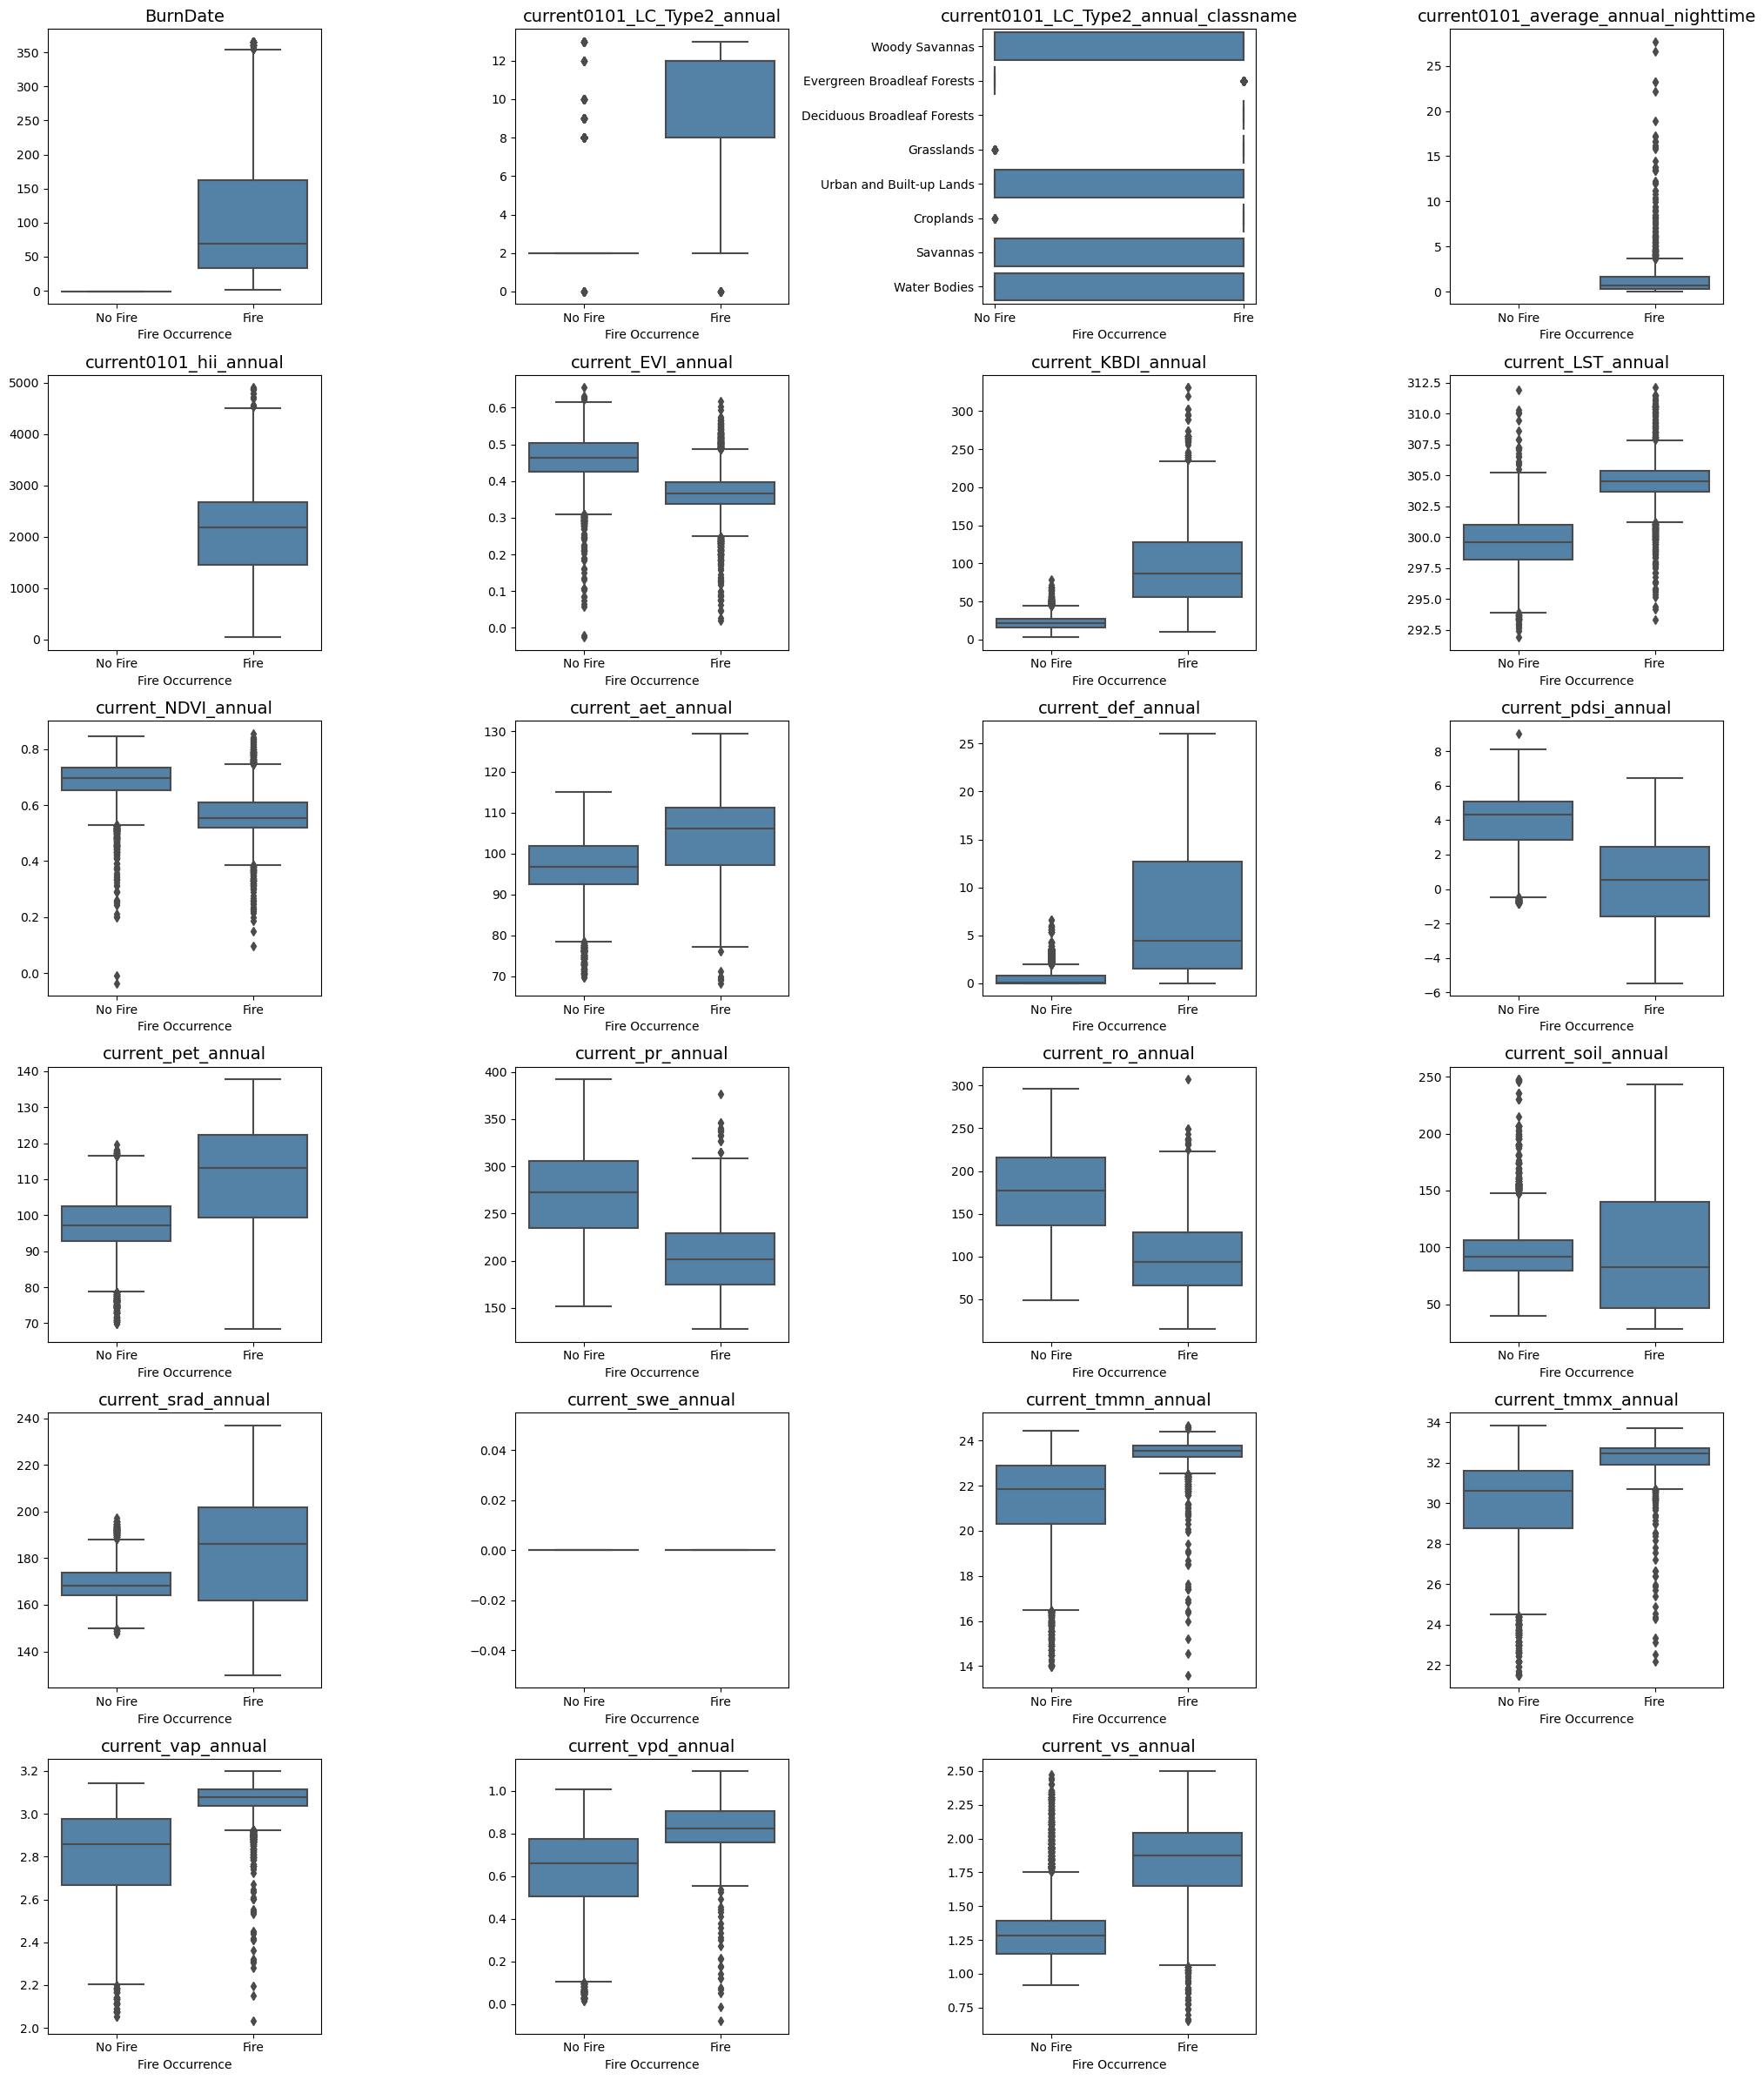

In [11]:
# Adjusting the layout to generate box plots in multiple columns and rows for better visualization
num_cols_layout = 4  # Number of columns for the layout
num_rows_layout = -(-len(variables_without_admin) // num_cols_layout)  # Calculate the number of rows required

plt.figure(figsize=(20, 4 * num_rows_layout))
for i, var in enumerate(variables_without_admin, 1):
    plt.subplot(num_rows_layout, num_cols_layout, i)
    sns.boxplot(data=data, x='fire', y=var, color='steelblue')
    plt.title(f'{var}', fontsize=14)
    plt.xlabel('Fire Occurrence')
    plt.ylabel('')
    plt.xticks(ticks=[0, 1], labels=['No Fire', 'Fire'])
plt.tight_layout()
plt.savefig('boxplots_for_research_paper.png', dpi=300)
plt.show()

In [12]:
import scipy.stats as stats

# Performing statistical analysis for all key variables excluding administrative boundaries
results = []
for var in variables_without_admin:
    # Performing a t-test to compare means of the variable for fire and no fire occurrences
    group1 = data[data['fire'] == 0][var].dropna()
    group2 = data[data['fire'] == 1][var].dropna()
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

    # Appending results to the list
    results.append({'Variable': var, 'T-Statistic': t_stat, 'P-Value': p_value})

# Converting results to a DataFrame
results_df = pd.DataFrame(results)
results_df

C:\Users\User1983\AppData\Local\Temp\ipykernel_17400\2295762088.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [13]:
# Identifying non-numeric variables
non_numeric_vars = data[variables_without_admin].select_dtypes(exclude=['float64', 'int64']).columns.tolist()

# Excluding non-numeric variables from the list of key variables
numeric_vars = [var for var in variables_without_admin if var not in non_numeric_vars]

# Performing statistical analysis for numeric variables
results_numeric = []
for var in numeric_vars:
    group1 = data[data['fire'] == 0][var].dropna()
    group2 = data[data['fire'] == 1][var].dropna()
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    results_numeric.append({'Variable': var, 'T-Statistic': t_stat, 'P-Value': p_value})

# Converting results to a DataFrame
results_numeric_df = pd.DataFrame(results_numeric)
results_numeric_df

C:\Users\User1983\AppData\Local\Temp\ipykernel_17400\3578842488.py:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)


,Variable,T-Statistic,P-Value
0,BurnDate,-93.281471,0.000000
1,current0101_LC_Type2_annual,-110.264588,0.000000
2,current0101_average_annual_nighttime,NaN,NaN
3,current0101_hii_annual,NaN,NaN
4,current_EVI_annual,77.210684,0.000000
5,current_KBDI_annual,-76.939722,0.000000
6,current_LST_annual,-135.604662,0.000000
7,current_NDVI_annual,80.409764,0.000000
8,current_aet_annual,-52.836656,0.000000
9,current_def_annual,-68.871458,0.000000


In [14]:
# Displaying p-values in scientific notation for better clarity
results_numeric_df['P-Value'] = results_numeric_df['P-Value'].apply(lambda x: '{:.2e}'.format(x))
results_numeric_df

,Variable,T-Statistic,P-Value
0,BurnDate,-93.281471,0.00e+00
1,current0101_LC_Type2_annual,-110.264588,0.00e+00
2,current0101_average_annual_nighttime,NaN,nan
3,current0101_hii_annual,NaN,nan
4,current_EVI_annual,77.210684,0.00e+00
5,current_KBDI_annual,-76.939722,0.00e+00
6,current_LST_annual,-135.604662,0.00e+00
7,current_NDVI_annual,80.409764,0.00e+00
8,current_aet_annual,-52.836656,0.00e+00
9,current_def_annual,-68.871458,0.00e+00


In [15]:
# Calculating the correlation of all key variables with the 'fire' column
correlation = data[numeric_vars + ['fire']].corr()['fire'].drop('fire')

# Sorting the correlation values by magnitude
correlation_magnitude = correlation.abs().sort_values(ascending=False)
correlation_sorted = correlation[correlation_magnitude.index]

# Displaying the sorted correlation values
correlation_sorted

current_LST_annual                      0.790718
current0101_LC_Type2_annual             0.722950
current_KBDI_annual                     0.715133
current_vs_annual                       0.673851
BurnDate                                0.662177
current_ro_annual                      -0.625702
current_vap_annual                      0.616572
current_pr_annual                      -0.610286
current_NDVI_annual                    -0.607061
current_pdsi_annual                    -0.594987
current_pet_annual                      0.592569
current_EVI_annual                     -0.591595
current_tmmn_annual                     0.579588
current_tmmx_annual                     0.558138
current_def_annual                      0.546449
current_vpd_annual                      0.517731
current_aet_annual                      0.448445
current_srad_annual                     0.407322
current_soil_annual                     0.004008
current0101_average_annual_nighttime         NaN
current0101_hii_annu

In [16]:
# Excluding 'BurnDate' from the list of numeric variables
numeric_vars = [var for var in numeric_vars if var != 'BurnDate']

# Recalculating the correlation of all key variables (excluding 'BurnDate') with the 'fire' column
correlation_without_burndate = data[numeric_vars + ['fire']].corr()['fire'].drop('fire')

# Sorting the correlation values by magnitude
correlation_magnitude_without_burndate = correlation_without_burndate.abs().sort_values(ascending=False)
correlation_sorted_without_burndate = correlation_without_burndate[correlation_magnitude_without_burndate.index]

# Displaying the sorted correlation values
correlation_sorted_without_burndate

current_LST_annual                      0.790718
current0101_LC_Type2_annual             0.722950
current_KBDI_annual                     0.715133
current_vs_annual                       0.673851
current_ro_annual                      -0.625702
current_vap_annual                      0.616572
current_pr_annual                      -0.610286
current_NDVI_annual                    -0.607061
current_pdsi_annual                    -0.594987
current_pet_annual                      0.592569
current_EVI_annual                     -0.591595
current_tmmn_annual                     0.579588
current_tmmx_annual                     0.558138
current_def_annual                      0.546449
current_vpd_annual                      0.517731
current_aet_annual                      0.448445
current_srad_annual                     0.407322
current_soil_annual                     0.004008
current0101_average_annual_nighttime         NaN
current0101_hii_annual                       NaN
current_swe_annual  

In [17]:
# Examining the statistical summary of each key feature for fire and non-fire events
fire_stats = data[data['fire'] == 1][numeric_vars].describe().transpose()
no_fire_stats = data[data['fire'] == 0][numeric_vars].describe().transpose()

# Renaming columns for clarity
fire_stats.columns = ['fire_' + col for col in fire_stats.columns]
no_fire_stats.columns = ['no_fire_' + col for col in no_fire_stats.columns]

# Merging the two dataframes for a side-by-side comparison
combined_stats = pd.concat([fire_stats, no_fire_stats], axis=1)
combined_stats

,fire_count,fire_mean,fire_std,fire_min,fire_25%,fire_50%,fire_75%,fire_max,no_fire_count,no_fire_mean,no_fire_std,no_fire_min,no_fire_25%,no_fire_50%,no_fire_75%,no_fire_max
current0101_LC_Type2_annual,5557.0,9.613101,3.652621,0.000000,8.000000,12.000000,12.000000,13.000000,5526.0,3.088853,2.465596,0.000000,2.000000,2.000000,2.000000,13.000000
current0101_average_annual_nighttime,1960.0,1.339290,2.232185,0.022331,0.274547,0.704063,1.622776,27.697971,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
current0101_hii_annual,5403.0,2094.722932,881.257247,42.000000,1450.000000,2185.000000,2675.000000,4908.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
current_EVI_annual,5553.0,0.369616,0.059076,0.020500,0.338167,0.366379,0.397650,0.618325,5526.0,0.460531,0.064722,-0.026012,0.426606,0.464444,0.504208,0.655154
current_KBDI_annual,3404.0,95.862034,55.793098,10.600637,55.434100,86.295406,127.756520,331.016186,5526.0,21.638714,9.450237,2.790972,15.518893,21.436169,27.073016,78.217417
current_LST_annual,5522.0,304.470895,1.561426,293.310208,303.701542,304.547642,305.378258,312.131212,5510.0,299.544256,2.200019,291.882222,298.156111,299.591125,301.010991,311.907500
current_NDVI_annual,5553.0,0.567431,0.078325,0.095900,0.520154,0.554804,0.610237,0.855733,5526.0,0.684663,0.075106,-0.035800,0.651780,0.697248,0.733865,0.846917
current_aet_annual,5557.0,104.877329,9.327677,68.258333,97.225000,106.208333,111.266667,129.433333,5526.0,96.147513,8.020696,69.758333,92.595833,96.716667,101.983333,115.008333
current_def_annual,5557.0,7.798602,7.765711,0.000000,1.550000,4.391667,12.658333,26.058333,5526.0,0.572920,0.925342,0.000000,0.000000,0.066667,0.791667,6.641667
current_pdsi_annual,5557.0,0.453241,2.904917,-5.475000,-1.590000,0.527500,2.466667,6.464167,5526.0,3.939350,1.623397,-0.850833,2.843750,4.307083,5.062500,9.036667


In [18]:
combined_stats

,fire_count,fire_mean,fire_std,fire_min,fire_25%,fire_50%,fire_75%,fire_max,no_fire_count,no_fire_mean,no_fire_std,no_fire_min,no_fire_25%,no_fire_50%,no_fire_75%,no_fire_max
current0101_LC_Type2_annual,5557.0,9.613101,3.652621,0.000000,8.000000,12.000000,12.000000,13.000000,5526.0,3.088853,2.465596,0.000000,2.000000,2.000000,2.000000,13.000000
current0101_average_annual_nighttime,1960.0,1.339290,2.232185,0.022331,0.274547,0.704063,1.622776,27.697971,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
current0101_hii_annual,5403.0,2094.722932,881.257247,42.000000,1450.000000,2185.000000,2675.000000,4908.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
current_EVI_annual,5553.0,0.369616,0.059076,0.020500,0.338167,0.366379,0.397650,0.618325,5526.0,0.460531,0.064722,-0.026012,0.426606,0.464444,0.504208,0.655154
current_KBDI_annual,3404.0,95.862034,55.793098,10.600637,55.434100,86.295406,127.756520,331.016186,5526.0,21.638714,9.450237,2.790972,15.518893,21.436169,27.073016,78.217417
current_LST_annual,5522.0,304.470895,1.561426,293.310208,303.701542,304.547642,305.378258,312.131212,5510.0,299.544256,2.200019,291.882222,298.156111,299.591125,301.010991,311.907500
current_NDVI_annual,5553.0,0.567431,0.078325,0.095900,0.520154,0.554804,0.610237,0.855733,5526.0,0.684663,0.075106,-0.035800,0.651780,0.697248,0.733865,0.846917
current_aet_annual,5557.0,104.877329,9.327677,68.258333,97.225000,106.208333,111.266667,129.433333,5526.0,96.147513,8.020696,69.758333,92.595833,96.716667,101.983333,115.008333
current_def_annual,5557.0,7.798602,7.765711,0.000000,1.550000,4.391667,12.658333,26.058333,5526.0,0.572920,0.925342,0.000000,0.000000,0.066667,0.791667,6.641667
current_pdsi_annual,5557.0,0.453241,2.904917,-5.475000,-1.590000,0.527500,2.466667,6.464167,5526.0,3.939350,1.623397,-0.850833,2.843750,4.307083,5.062500,9.036667


In [20]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Variance Inflation Factor (VIF)
# Removing any NaN values for VIF calculation
vif_data = data[numeric_vars].dropna()
vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
vif_df = pd.DataFrame({'Variable': numeric_vars, 'VIF': vif_values}).sort_values(by='VIF', ascending=False)

# 2. Principal Component Analysis (PCA)
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_vars].dropna())

# Applying PCA
pca = PCA()
pca.fit(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
pca_df = pd.DataFrame({'Principal Component': range(1, len(explained_variance_ratio) + 1),
                       'Explained Variance Ratio': explained_variance_ratio,
                       'Cumulative Variance Explained': cumulative_variance})

vif_df, pca_df.head(10)

C:\Users\User1983\miniconda3\envs\visualize\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


(                                Variable           VIF
 10                    current_pet_annual  2.958313e+08
 7                     current_aet_annual  2.498931e+08
 8                     current_def_annual  3.046390e+06
 11                     current_pr_annual  6.832782e+04
 17                   current_tmmx_annual  5.072532e+04
 18                    current_vap_annual  2.462114e+04
 14                   current_srad_annual  2.391801e+04
 12                     current_ro_annual  2.002014e+04
 5                     current_LST_annual  1.691331e+04
 16                   current_tmmn_annual  1.178412e+04
 20                     current_vs_annual  6.928197e+02
 19                    current_vpd_annual  5.194699e+02
 6                    current_NDVI_annual  3.856843e+02
 3                     current_EVI_annual  2.355254e+02
 13                   current_soil_annual  2.697046e+01
 0            current0101_LC_Type2_annual  1.829012e+01
 2                 current0101_hii_annual  1.825

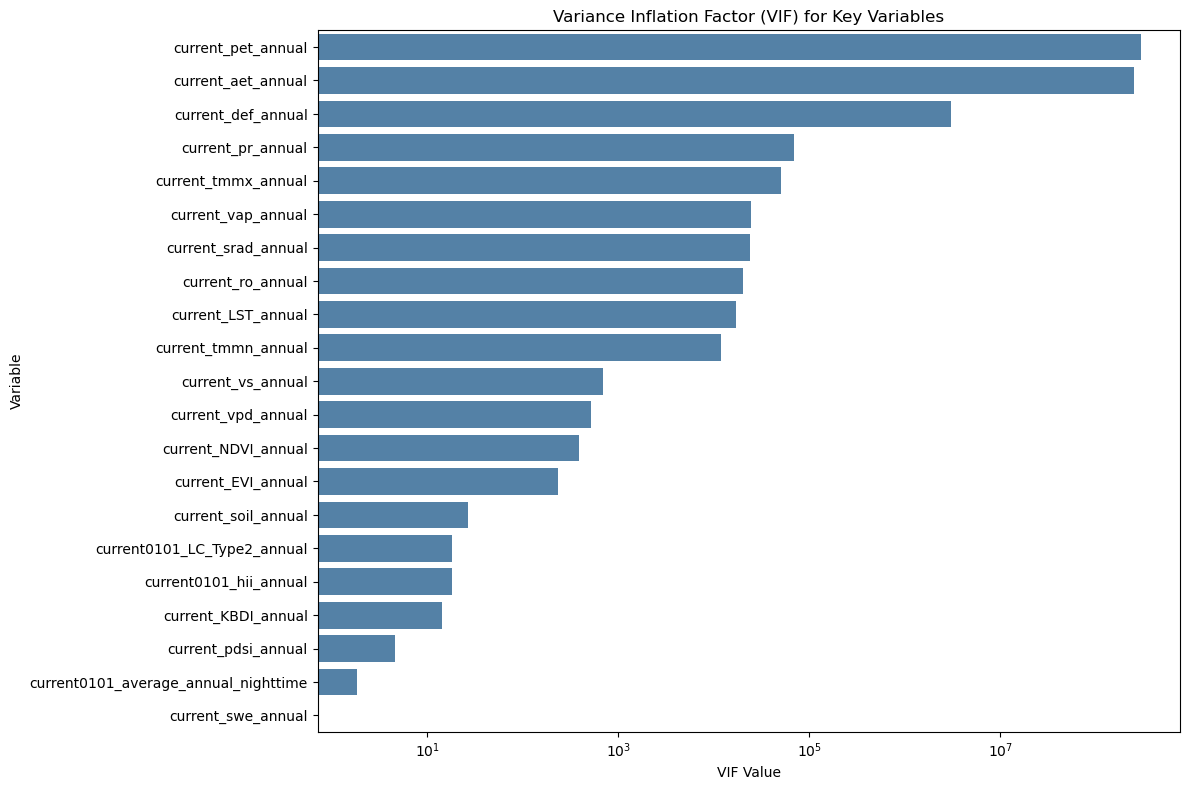

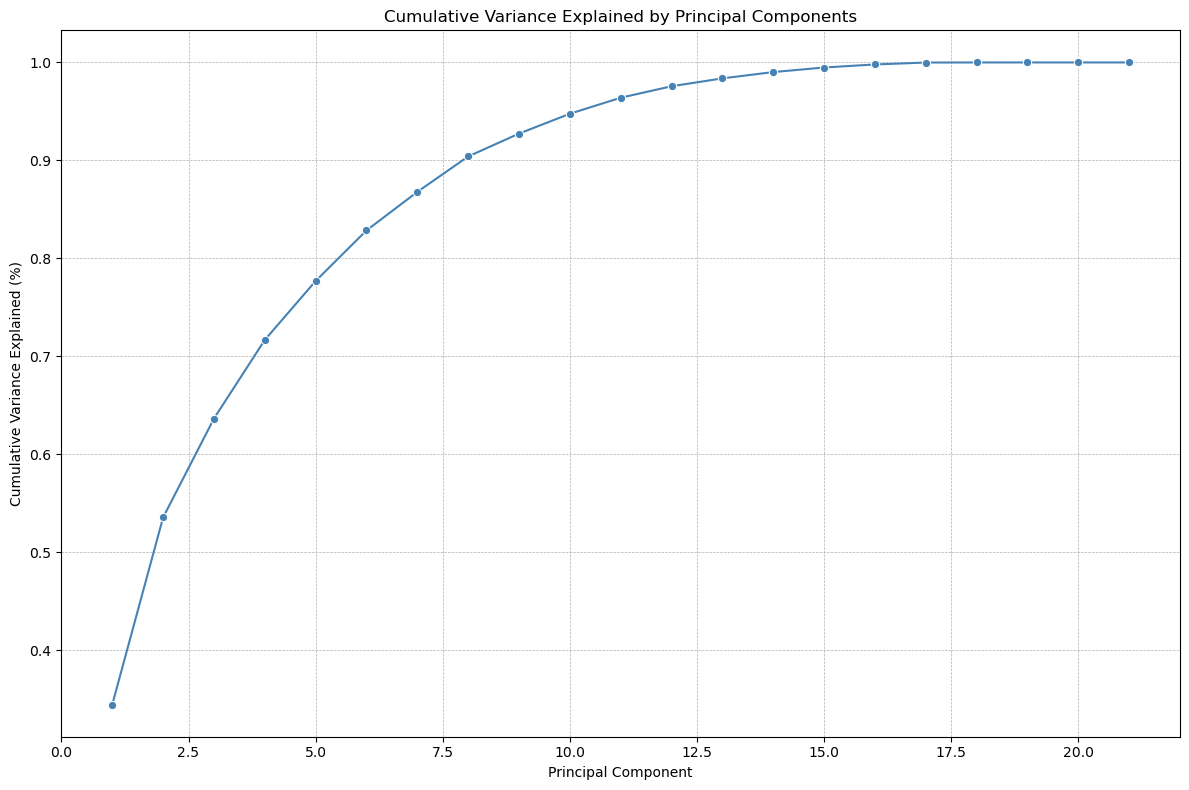

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the color for the plots
plot_color = 'steelblue'

# 1. VIF Analysis Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='VIF', y='Variable', data=vif_df, color=plot_color)
plt.title('Variance Inflation Factor (VIF) for Key Variables')
plt.xlabel('VIF Value')
plt.ylabel('Variable')
plt.xscale('log')
plt.tight_layout()
plt.show()

# 2. PCA Analysis Plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='Principal Component', y='Cumulative Variance Explained', data=pca_df, color=plot_color, marker='o')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

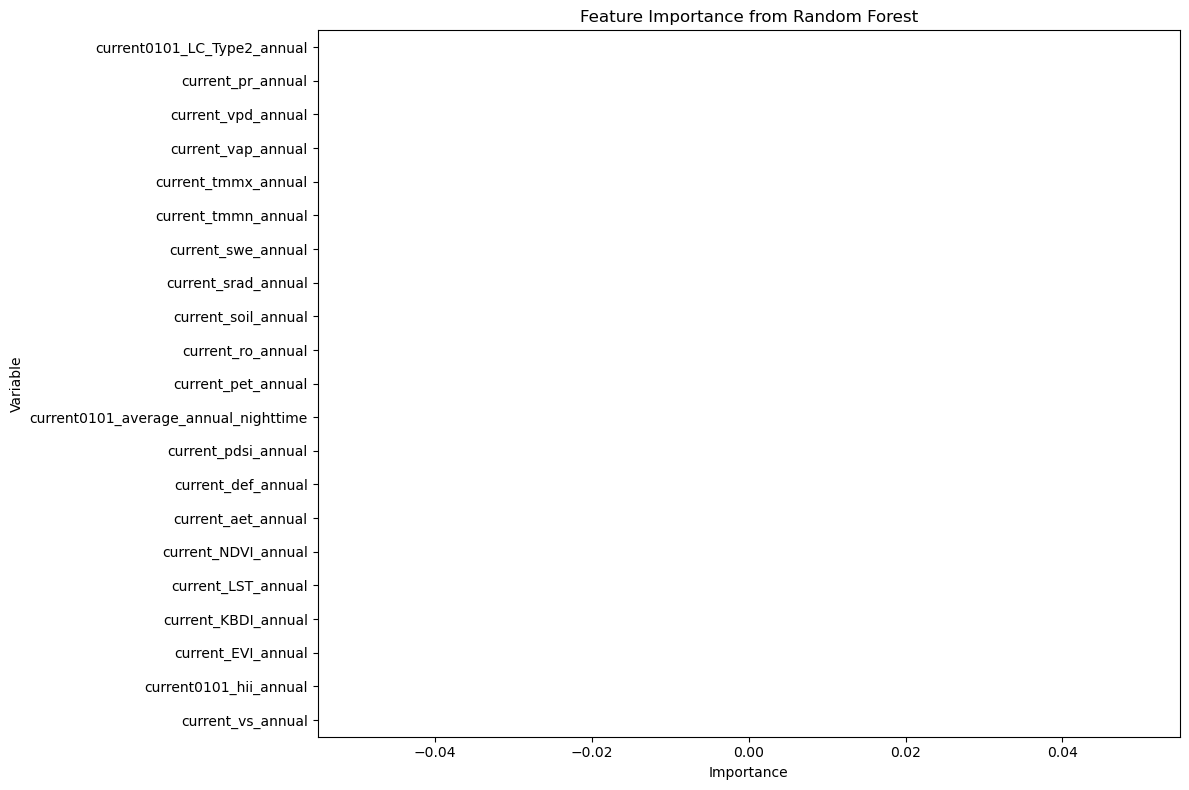

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Preparing the data
X = data[numeric_vars].dropna()
y = data.loc[X.index, 'fire']

# Training a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extracting feature importances
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Variable': numeric_vars, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Variable', data=importance_df, color=plot_color)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

In [23]:
# Displaying the feature importance values in table format
importance_df

,Variable,Importance
0,current0101_LC_Type2_annual,0.0
11,current_pr_annual,0.0
19,current_vpd_annual,0.0
18,current_vap_annual,0.0
17,current_tmmx_annual,0.0
16,current_tmmn_annual,0.0
15,current_swe_annual,0.0
14,current_srad_annual,0.0
13,current_soil_annual,0.0
12,current_ro_annual,0.0


In [24]:
# Checking the distribution of the target variable 'fire'
y.value_counts()

1    1841
Name: fire, dtype: int64

In [25]:
# Checking the distribution of the 'fire' column in the entire dataset
data['fire'].value_counts()

1    5557
0    5526
Name: fire, dtype: int64

In [26]:
# Retraining the Random Forest Classifier on the entire dataset
rf.fit(X, y)

# Extracting feature importances
feature_importances = rf.feature_importances_
importance_df_updated = pd.DataFrame({'Variable': numeric_vars, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
importance_df_updated

,Variable,Importance
0,current0101_LC_Type2_annual,0.0
11,current_pr_annual,0.0
19,current_vpd_annual,0.0
18,current_vap_annual,0.0
17,current_tmmx_annual,0.0
16,current_tmmn_annual,0.0
15,current_swe_annual,0.0
14,current_srad_annual,0.0
13,current_soil_annual,0.0
12,current_ro_annual,0.0


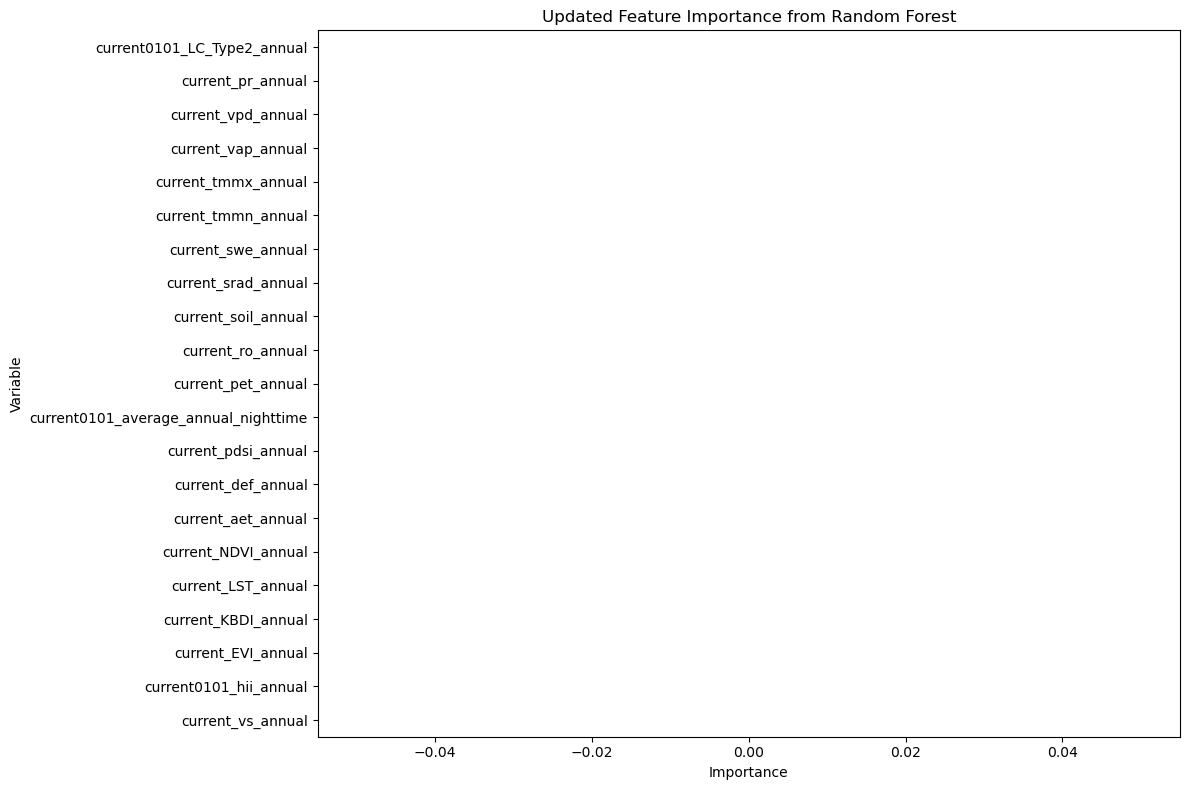

In [27]:
# Plotting the updated feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Variable', data=importance_df_updated, color=plot_color)
plt.title('Updated Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import RFE, chi2, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway

# 1. Logistic Regression Coefficients
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X, y)
log_reg_coefs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': log_reg.coef_[0]}).sort_values(by='Coefficient', ascending=False)

# 2. Recursive Feature Elimination (RFE)
rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=1, step=1)
rfe_selector.fit(X, y)
rfe_ranking = pd.DataFrame({'Variable': numeric_vars, 'RFE Rank': rfe_selector.ranking_}).sort_values(by='RFE Rank')

# 3. Chi-Squared Test (For this, we need to discretize the continuous variables)
X_discrete = X.apply(lambda x: pd.cut(x, bins=3, labels=[0, 1, 2])).fillna(0).astype(int)  # Discretizing into 3 bins
chi2_values, chi2_pvalues = chi2(X_discrete, y)
chi2_df = pd.DataFrame({'Variable': numeric_vars, 'Chi2 Value': chi2_values, 'p-value': chi2_pvalues}).sort_values(by='Chi2 Value', ascending=False)

# 4. Mutual Information
mutual_info_values = mutual_info_classif(X, y)
mutual_info_df = pd.DataFrame({'Variable': numeric_vars, 'Mutual Information': mutual_info_values}).sort_values(by='Mutual Information', ascending=False)

# 5. ANOVA (Analysis of Variance)
anova_fvalues = []
anova_pvalues = []
for col in numeric_vars:
    group1 = X[y == 0][col].dropna()
    group2 = X[y == 1][col].dropna()
    f_val, p_val = f_oneway(group1, group2)
    anova_fvalues.append(f_val)
    anova_pvalues.append(p_val)
anova_df = pd.DataFrame({'Variable': numeric_vars, 'F-value': anova_fvalues, 'p-value': anova_pvalues}).sort_values(by='F-value', ascending=False)

# 6. LASSO Regression
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X, y)
lasso_coefs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)

log_reg_coefs, rfe_ranking, chi2_df, mutual_info_df, anova_df, lasso_coefs

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
# Ensuring a balanced subset of data
fire_data = data[data['fire'] == 1].sample(5000, random_state=42)
no_fire_data = data[data['fire'] == 0].sample(5000, random_state=42)
balanced_data = pd.concat([fire_data, no_fire_data])

# Preparing the data
X_balanced = balanced_data[numeric_vars].dropna()
y_balanced = balanced_data.loc[X_balanced.index, 'fire']

# 1. Logistic Regression Coefficients
log_reg.fit(X_balanced, y_balanced)
log_reg_coefs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': log_reg.coef_[0]}).sort_values(by='Coefficient', ascending=False)

# 2. Recursive Feature Elimination (RFE)
rfe_selector.fit(X_balanced, y_balanced)
rfe_ranking = pd.DataFrame({'Variable': numeric_vars, 'RFE Rank': rfe_selector.ranking_}).sort_values(by='RFE Rank')

# 3. Chi-Squared Test
X_discrete_balanced = X_balanced.apply(lambda x: pd.cut(x, bins=3, labels=[0, 1, 2])).fillna(0).astype(int)
chi2_values, chi2_pvalues = chi2(X_discrete_balanced, y_balanced)
chi2_df = pd.DataFrame({'Variable': numeric_vars, 'Chi2 Value': chi2_values, 'p-value': chi2_pvalues}).sort_values(by='Chi2 Value', ascending=False)

# 4. Mutual Information
mutual_info_values = mutual_info_classif(X_balanced, y_balanced)
mutual_info_df = pd.DataFrame({'Variable': numeric_vars, 'Mutual Information': mutual_info_values}).sort_values(by='Mutual Information', ascending=False)

# 5. ANOVA (Analysis of Variance)
anova_fvalues = []
anova_pvalues = []
for col in numeric_vars:
    group1 = X_balanced[y_balanced == 0][col].dropna()
    group2 = X_balanced[y_balanced == 1][col].dropna()
    f_val, p_val = f_oneway(group1, group2)
    anova_fvalues.append(f_val)
    anova_pvalues.append(p_val)
anova_df = pd.DataFrame({'Variable': numeric_vars, 'F-value': anova_fvalues, 'p-value': anova_pvalues}).sort_values(by='F-value', ascending=False)

# 6. LASSO Regression
lasso.fit(X_balanced, y_balanced)
lasso_coefs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)

log_reg_coefs, rfe_ranking, chi2_df, mutual_info_df, anova_df, lasso_coefs

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 1. Logistic Regression Coefficients
log_reg.fit(X_train, y_train)
log_reg_coefs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': log_reg.coef_[0]}).sort_values(by='Coefficient', ascending=False)

# 2. Recursive Feature Elimination (RFE)
rfe_selector.fit(X_train, y_train)
rfe_ranking = pd.DataFrame({'Variable': numeric_vars, 'RFE Rank': rfe_selector.ranking_}).sort_values(by='RFE Rank')

# 3. Chi-Squared Test
X_discrete_train = X_train.apply(lambda x: pd.cut(x, bins=3, labels=[0, 1, 2])).fillna(0).astype(int)
chi2_values, chi2_pvalues = chi2(X_discrete_train, y_train)
chi2_df = pd.DataFrame({'Variable': numeric_vars, 'Chi2 Value': chi2_values, 'p-value': chi2_pvalues}).sort_values(by='Chi2 Value', ascending=False)

# 4. Mutual Information
mutual_info_values = mutual_info_classif(X_train, y_train)
mutual_info_df = pd.DataFrame({'Variable': numeric_vars, 'Mutual Information': mutual_info_values}).sort_values(by='Mutual Information', ascending=False)

# 5. ANOVA (Analysis of Variance)
anova_fvalues = []
anova_pvalues = []
for col in numeric_vars:
    group1 = X_train[y_train == 0][col].dropna()
    group2 = X_train[y_train == 1][col].dropna()
    f_val, p_val = f_oneway(group1, group2)
    anova_fvalues.append(f_val)
    anova_pvalues.append(p_val)
anova_df = pd.DataFrame({'Variable': numeric_vars, 'F-value': anova_fvalues, 'p-value': anova_pvalues}).sort_values(by='F-value', ascending=False)

# 6. LASSO Regression
lasso.fit(X_train, y_train)
lasso_coefs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)

log_reg_coefs, rfe_ranking, chi2_df, mutual_info_df, anova_df, lasso_coefs

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
# Checking the distribution of the 'fire' column
fire_distribution = data['fire'].value_counts()
fire_distribution

In [ ]:
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import RFE, chi2, mutual_info_classif
from scipy.stats import f_oneway

# 1. Logistic Regression Coefficients
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X, y)
log_reg_coeffs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': log_reg.coef_[0]}).sort_values(by='Coefficient', ascending=False)

# 2. Recursive Feature Elimination (RFE)
rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=1, step=1)
rfe_selector.fit(X, y)
rfe_ranking = pd.DataFrame({'Variable': numeric_vars, 'RFE Rank': rfe_selector.ranking_}).sort_values(by='RFE Rank')

# 3. Chi-Squared Test (For this, we need to discretize the continuous variables)
X_discrete = (X - X.min()) / (X.max() - X.min()) * 10
X_discrete = X_discrete.astype(int)
chi2_values, chi2_pvalues = chi2(X_discrete, y)
chi2_df = pd.DataFrame({'Variable': numeric_vars, 'Chi2 Value': chi2_values, 'p-value': chi2_pvalues}).sort_values(by='Chi2 Value', ascending=False)

# 4. Mutual Information
mutual_info_values = mutual_info_classif(X, y)
mutual_info_df = pd.DataFrame({'Variable': numeric_vars, 'Mutual Information': mutual_info_values}).sort_values(by='Mutual Information', ascending=False)

# 5. ANOVA (Analysis of Variance)
f_values, p_values = [], []
for col in numeric_vars:
    group1 = X[y == 0][col].dropna()
    group2 = X[y == 1][col].dropna()
    f, p = f_oneway(group1, group2)
    f_values.append(f)
    p_values.append(p)
anova_df = pd.DataFrame({'Variable': numeric_vars, 'F-value': f_values, 'p-value': p_values}).sort_values(by='F-value', ascending=False)

# 6. LASSO Regression
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X, y)
lasso_coeffs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)

log_reg_coeffs, rfe_ranking, chi2_df, mutual_info_df, anova_df, lasso_coeffs

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
# Manually creating a balanced subset
fire_subset = data[data['fire'] == 1].sample(5000, random_state=42)
no_fire_subset = data[data['fire'] == 0].sample(5000, random_state=42)
balanced_subset = pd.concat([fire_subset, no_fire_subset])

# Preparing the data
X_subset = balanced_subset[numeric_vars]
y_subset = balanced_subset['fire']

# 1. Logistic Regression Coefficients
log_reg.fit(X_subset, y_subset)
log_reg_coefs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': log_reg.coef_[0]}).sort_values(by='Coefficient', ascending=False)

# 2. Recursive Feature Elimination (RFE)
rfe_selector.fit(X_subset, y_subset)
rfe_ranking = pd.DataFrame({'Variable': numeric_vars, 'RFE Rank': rfe_selector.ranking_}).sort_values(by='RFE Rank')

# 3. Chi-Squared Test
X_discrete_subset = X_subset.apply(lambda x: pd.cut(x, bins=3, labels=[0, 1, 2])).fillna(0).astype(int)
chi2_values, chi2_pvalues = chi2(X_discrete_subset, y_subset)
chi2_df = pd.DataFrame({'Variable': numeric_vars, 'Chi2 Value': chi2_values, 'p-value': chi2_pvalues}).sort_values(by='Chi2 Value', ascending=False)

# 4. Mutual Information
mutual_info_values = mutual_info_classif(X_subset, y_subset)
mutual_info_df = pd.DataFrame({'Variable': numeric_vars, 'Mutual Information': mutual_info_values}).sort_values(by='Mutual Information', ascending=False)

# 5. ANOVA (Analysis of Variance)
anova_fvalues = []
anova_pvalues = []
for col in numeric_vars:
    group1 = X_subset[y_subset == 0][col].dropna()
    group2 = X_subset[y_subset == 1][col].dropna()
    f_val, p_val = f_oneway(group1, group2)
    anova_fvalues.append(f_val)
    anova_pvalues.append(p_val)
anova_df = pd.DataFrame({'Variable': numeric_vars, 'F-value': anova_fvalues, 'p-value': anova_pvalues}).sort_values(by='F-value', ascending=False)

# 6. LASSO Regression
lasso.fit(X_subset, y_subset)
lasso_coefs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)

log_reg_coefs, rfe_ranking, chi2_df, mutual_info_df, anova_df, lasso_coefs

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import RFE, chi2, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway

# 1. Logistic Regression Coefficients
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X, y)
log_reg_coef = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': log_reg.coef_[0]}).sort_values(by='Coefficient', ascending=False)

# 2. Recursive Feature Elimination (RFE)
rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=1, step=1)
rfe_selector.fit(X, y)
rfe_ranking = pd.DataFrame({'Variable': numeric_vars, 'RFE Rank': rfe_selector.ranking_}).sort_values(by='RFE Rank')

# 3. Chi-Squared Test (For this, we need to discretize the continuous variables)
X_discrete = X.apply(lambda x: pd.cut(x, bins=3, labels=[0, 1, 2])).fillna(0).astype(int)  # Discretizing into 3 bins
chi2_values, chi2_pvalues = chi2(X_discrete, y)
chi2_df = pd.DataFrame({'Variable': numeric_vars, 'Chi2 Value': chi2_values, 'p-value': chi2_pvalues}).sort_values(by='Chi2 Value', ascending=False)

# 4. Mutual Information
mutual_info_values = mutual_info_classif(X, y)
mutual_info_df = pd.DataFrame({'Variable': numeric_vars, 'Mutual Information': mutual_info_values}).sort_values(by='Mutual Information', ascending=False)

# 5. ANOVA (Analysis of Variance)
anova_fvalues = []
anova_pvalues = []
for col in numeric_vars:
    group1 = X[y == 0][col].dropna()
    group2 = X[y == 1][col].dropna()
    fvalue, pvalue = f_oneway(group1, group2)
    anova_fvalues.append(fvalue)
    anova_pvalues.append(pvalue)
anova_df = pd.DataFrame({'Variable': numeric_vars, 'F-value': anova_fvalues, 'p-value': anova_pvalues}).sort_values(by='F-value', ascending=False)

# 6. LASSO Regression
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X, y)
lasso_coef = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)

log_reg_coef, rfe_ranking, chi2_df, mutual_info_df, anova_df, lasso_coef

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
# Splitting the data into fire and non-fire subsets
fire_data = data[data['fire'] == 1]
non_fire_data = data[data['fire'] == 0]

# Taking a balanced sample from both subsets
sample_size = min(len(fire_data), len(non_fire_data))
balanced_fire_data = fire_data.sample(sample_size, random_state=42)
balanced_non_fire_data = non_fire_data.sample(sample_size, random_state=42)

# Combining the balanced samples
balanced_data = pd.concat([balanced_fire_data, balanced_non_fire_data])

# Preparing the data for analysis
X_balanced = balanced_data[numeric_vars].dropna()
y_balanced = balanced_data.loc[X_balanced.index, 'fire']

# 1. Logistic Regression Coefficients
log_reg.fit(X_balanced, y_balanced)
log_reg_coeffs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': log_reg.coef_[0]}).sort_values(by='Coefficient', ascending=False)

# 2. Recursive Feature Elimination (RFE)
rfe_selector.fit(X_balanced, y_balanced)
rfe_ranking = pd.DataFrame({'Variable': numeric_vars, 'RFE Rank': rfe_selector.ranking_}).sort_values(by='RFE Rank')

# 3. Chi-Squared Test
X_discrete_balanced = (X_balanced - X_balanced.min()) / (X_balanced.max() - X_balanced.min()) * 10
X_discrete_balanced = X_discrete_balanced.astype(int)
chi2_values, chi2_pvalues = chi2(X_discrete_balanced, y_balanced)
chi2_df = pd.DataFrame({'Variable': numeric_vars, 'Chi2 Value': chi2_values, 'p-value': chi2_pvalues}).sort_values(by='Chi2 Value', ascending=False)

# 4. Mutual Information
mutual_info_values = mutual_info_classif(X_balanced, y_balanced)
mutual_info_df = pd.DataFrame({'Variable': numeric_vars, 'Mutual Information': mutual_info_values}).sort_values(by='Mutual Information', ascending=False)

# 5. ANOVA (Analysis of Variance)
f_values, p_values = [], []
for col in numeric_vars:
    group1 = X_balanced[y_balanced == 0][col].dropna()
    group2 = X_balanced[y_balanced == 1][col].dropna()
    f, p = f_oneway(group1, group2)
    f_values.append(f)
    p_values.append(p)
anova_df = pd.DataFrame({'Variable': numeric_vars, 'F-value': f_values, 'p-value': p_values}).sort_values(by='F-value', ascending=False)

# 6. LASSO Regression
lasso.fit(X_balanced, y_balanced)
lasso_coeffs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)

log_reg_coeffs, rfe_ranking, chi2_df, mutual_info_df, anova_df, lasso_coeffs

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
# Removing rows with missing values in the subset
balanced_subset_cleaned = balanced_subset.dropna(subset=numeric_vars)
X_subset_cleaned = balanced_subset_cleaned[numeric_vars]
y_subset_cleaned = balanced_subset_cleaned['fire']

# 1. Logistic Regression Coefficients
log_reg.fit(X_subset_cleaned, y_subset_cleaned)
log_reg_coefs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': log_reg.coef_[0]}).sort_values(by='Coefficient', ascending=False)

# 2. Recursive Feature Elimination (RFE)
rfe_selector.fit(X_subset_cleaned, y_subset_cleaned)
rfe_ranking = pd.DataFrame({'Variable': numeric_vars, 'RFE Rank': rfe_selector.ranking_}).sort_values(by='RFE Rank')

# 3. Chi-Squared Test
X_discrete_subset_cleaned = X_subset_cleaned.apply(lambda x: pd.cut(x, bins=3, labels=[0, 1, 2])).fillna(0).astype(int)
chi2_values, chi2_pvalues = chi2(X_discrete_subset_cleaned, y_subset_cleaned)
chi2_df = pd.DataFrame({'Variable': numeric_vars, 'Chi2 Value': chi2_values, 'p-value': chi2_pvalues}).sort_values(by='Chi2 Value', ascending=False)

# 4. Mutual Information
mutual_info_values = mutual_info_classif(X_subset_cleaned, y_subset_cleaned)
mutual_info_df = pd.DataFrame({'Variable': numeric_vars, 'Mutual Information': mutual_info_values}).sort_values(by='Mutual Information', ascending=False)

# 5. ANOVA (Analysis of Variance)
anova_fvalues = []
anova_pvalues = []
for col in numeric_vars:
    group1 = X_subset_cleaned[y_subset_cleaned == 0][col].dropna()
    group2 = X_subset_cleaned[y_subset_cleaned == 1][col].dropna()
    f_val, p_val = f_oneway(group1, group2)
    anova_fvalues.append(f_val)
    anova_pvalues.append(p_val)
anova_df = pd.DataFrame({'Variable': numeric_vars, 'F-value': anova_fvalues, 'p-value': anova_pvalues}).sort_values(by='F-value', ascending=False)

# 6. LASSO Regression
lasso.fit(X_subset_cleaned, y_subset_cleaned)
lasso_coefs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)

log_reg_coefs, rfe_ranking, chi2_df, mutual_info_df, anova_df, lasso_coefs

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
# Ensuring that the balanced dataset contains both fire and non-fire events
balanced_data = pd.concat([fire_data.sample(sample_size, random_state=42), non_fire_data.sample(sample_size, random_state=42)])
X_balanced = balanced_data[numeric_vars]
y_balanced = balanced_data['fire']

# Verifying the distribution of the 'fire' column in the balanced dataset
y_balanced.value_counts()

In [ ]:
# Checking the distribution of the 'fire' column in the cleaned subset
fire_distribution_subset = y_subset_cleaned.value_counts()
fire_distribution_subset

In [ ]:
# Ensuring a balanced subset of data for both fire and non-fire events
fire_data = data[data['fire'] == 1].sample(5000, random_state=42)
non_fire_data = data[data['fire'] == 0].sample(5000, random_state=42)
balanced_data = pd.concat([fire_data, non_fire_data])

# Preparing the data
X_balanced = balanced_data[numeric_vars].dropna()
y_balanced = balanced_data.loc[X_balanced.index, 'fire']

# 1. Logistic Regression Coefficients
log_reg.fit(X_balanced, y_balanced)
log_reg_coef = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': log_reg.coef_[0]}).sort_values(by='Coefficient', ascending=False)

# 2. Recursive Feature Elimination (RFE)
rfe_selector.fit(X_balanced, y_balanced)
rfe_ranking = pd.DataFrame({'Variable': numeric_vars, 'RFE Rank': rfe_selector.ranking_}).sort_values(by='RFE Rank')

# 3. Chi-Squared Test
X_discrete_balanced = X_balanced.apply(lambda x: pd.cut(x, bins=3, labels=[0, 1, 2])).fillna(0).astype(int)
chi2_values, chi2_pvalues = chi2(X_discrete_balanced, y_balanced)
chi2_df = pd.DataFrame({'Variable': numeric_vars, 'Chi2 Value': chi2_values, 'p-value': chi2_pvalues}).sort_values(by='Chi2 Value', ascending=False)

# 4. Mutual Information
mutual_info_values = mutual_info_classif(X_balanced, y_balanced)
mutual_info_df = pd.DataFrame({'Variable': numeric_vars, 'Mutual Information': mutual_info_values}).sort_values(by='Mutual Information', ascending=False)

# 5. ANOVA
anova_fvalues = []
anova_pvalues = []
for col in numeric_vars:
    group1 = X_balanced[y_balanced == 0][col].dropna()
    group2 = X_balanced[y_balanced == 1][col].dropna()
    fvalue, pvalue = f_oneway(group1, group2)
    anova_fvalues.append(fvalue)
    anova_pvalues.append(pvalue)
anova_df = pd.DataFrame({'Variable': numeric_vars, 'F-value': anova_fvalues, 'p-value': anova_pvalues}).sort_values(by='F-value', ascending=False)

# 6. LASSO Regression
lasso.fit(X_balanced, y_balanced)
lasso_coef = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)

log_reg_coef, rfe_ranking, chi2_df, mutual_info_df, anova_df, lasso_coef

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
# Resampling the data to ensure a balanced subset
fire_subset_resampled = data[data['fire'] == 1].sample(2500, random_state=42)
no_fire_subset_resampled = data[data['fire'] == 0].sample(2500, random_state=42)
balanced_subset_resampled = pd.concat([fire_subset_resampled, no_fire_subset_resampled])

# Removing rows with missing values in the resampled subset
balanced_subset_resampled_cleaned = balanced_subset_resampled.dropna(subset=numeric_vars)
X_subset_resampled_cleaned = balanced_subset_resampled_cleaned[numeric_vars]
y_subset_resampled_cleaned = balanced_subset_resampled_cleaned['fire']

# Checking the distribution of the 'fire' column in the resampled cleaned subset
fire_distribution_resampled_subset = y_subset_resampled_cleaned.value_counts()
fire_distribution_resampled_subset

In [ ]:
# 1. Logistic Regression Coefficients
log_reg.fit(X_balanced, y_balanced)
log_reg_coeffs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': log_reg.coef_[0]}).sort_values(by='Coefficient', ascending=False)

# 2. Recursive Feature Elimination (RFE)
rfe_selector.fit(X_balanced, y_balanced)
rfe_ranking = pd.DataFrame({'Variable': numeric_vars, 'RFE Rank': rfe_selector.ranking_}).sort_values(by='RFE Rank')

# 3. Chi-Squared Test
X_discrete_balanced = (X_balanced - X_balanced.min()) / (X_balanced.max() - X_balanced.min()) * 10
X_discrete_balanced = X_discrete_balanced.astype(int)
chi2_values, chi2_pvalues = chi2(X_discrete_balanced, y_balanced)
chi2_df = pd.DataFrame({'Variable': numeric_vars, 'Chi2 Value': chi2_values, 'p-value': chi2_pvalues}).sort_values(by='Chi2 Value', ascending=False)

# 4. Mutual Information
mutual_info_values = mutual_info_classif(X_balanced, y_balanced)
mutual_info_df = pd.DataFrame({'Variable': numeric_vars, 'Mutual Information': mutual_info_values}).sort_values(by='Mutual Information', ascending=False)

# 5. ANOVA (Analysis of Variance)
f_values, p_values = [], []
for col in numeric_vars:
    group1 = X_balanced[y_balanced == 0][col].dropna()
    group2 = X_balanced[y_balanced == 1][col].dropna()
    f, p = f_oneway(group1, group2)
    f_values.append(f)
    p_values.append(p)
anova_df = pd.DataFrame({'Variable': numeric_vars, 'F-value': f_values, 'p-value': p_values}).sort_values(by='F-value', ascending=False)

# 6. LASSO Regression
lasso.fit(X_balanced, y_balanced)
lasso_coeffs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)

log_reg_coeffs, rfe_ranking, chi2_df, mutual_info_df, anova_df, lasso_coeffs

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
# Manually creating a balanced subset again
fire_subset_final = data[data['fire'] == 1].sample(2500, random_state=42)
no_fire_subset_final = data[data['fire'] == 0].sample(2500, random_state=42)
balanced_subset_final = pd.concat([fire_subset_final, no_fire_subset_final])

# Removing rows with missing values in the final subset
balanced_subset_final_cleaned = balanced_subset_final.dropna(subset=numeric_vars)
X_subset_final_cleaned = balanced_subset_final_cleaned[numeric_vars]
y_subset_final_cleaned = balanced_subset_final_cleaned['fire']

# Checking the distribution of the 'fire' column in the final cleaned subset
fire_distribution_final_subset = y_subset_final_cleaned.value_counts()
fire_distribution_final_subset

In [ ]:
# Verifying the distribution of the 'fire' column in the balanced dataset
y_balanced.value_counts()

In [ ]:
# 2. Recursive Feature Elimination (RFE)
rfe_selector.fit(X_balanced, y_balanced)
rfe_ranking = pd.DataFrame({'Variable': numeric_vars, 'RFE Rank': rfe_selector.ranking_}).sort_values(by='RFE Rank')

# 3. Chi-Squared Test
X_discrete_balanced = X_balanced.apply(lambda x: pd.cut(x, bins=3, labels=[0, 1, 2])).fillna(0).astype(int)
chi2_values, chi2_pvalues = chi2(X_discrete_balanced, y_balanced)
chi2_df = pd.DataFrame({'Variable': numeric_vars, 'Chi2 Value': chi2_values, 'p-value': chi2_pvalues}).sort_values(by='Chi2 Value', ascending=False)

# 4. Mutual Information
mutual_info_values = mutual_info_classif(X_balanced, y_balanced)
mutual_info_df = pd.DataFrame({'Variable': numeric_vars, 'Mutual Information': mutual_info_values}).sort_values(by='Mutual Information', ascending=False)

# 5. ANOVA
anova_fvalues = []
anova_pvalues = []
for col in numeric_vars:
    group1 = X_balanced[y_balanced == 0][col].dropna()
    group2 = X_balanced[y_balanced == 1][col].dropna()
    fvalue, pvalue = f_oneway(group1, group2)
    anova_fvalues.append(fvalue)
    anova_pvalues.append(pvalue)
anova_df = pd.DataFrame({'Variable': numeric_vars, 'F-value': anova_fvalues, 'p-value': anova_pvalues}).sort_values(by='F-value', ascending=False)

# 6. LASSO Regression
lasso.fit(X_balanced, y_balanced)
lasso_coef = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)

rfe_ranking, chi2_df, mutual_info_df, anova_df, lasso_coef

NameError: name 'rfe_selector' is not defined

In [ ]:
# Taking a balanced sample from both subsets again
balanced_fire_data = fire_data.sample(sample_size, random_state=42, replace=True)
balanced_non_fire_data = non_fire_data.sample(sample_size, random_state=42, replace=True)

# Combining the balanced samples
balanced_data = pd.concat([balanced_fire_data, balanced_non_fire_data])

# Verifying the distribution of the 'fire' column in the balanced dataset
balanced_data['fire'].value_counts()

In [ ]:
# Manually creating a balanced subset without dropping NaN values
fire_subset_final_no_na = data[data['fire'] == 1].sample(2500, random_state=42)
no_fire_subset_final_no_na = data[data['fire'] == 0].sample(2500, random_state=42)
balanced_subset_final_no_na = pd.concat([fire_subset_final_no_na, no_fire_subset_final_no_na])

# Checking the distribution of the 'fire' column in the final subset without dropping NaN values
fire_distribution_final_subset_no_na = balanced_subset_final_no_na['fire'].value_counts()
fire_distribution_final_subset_no_na

In [ ]:
# 2. Recursive Feature Elimination (RFE)
rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=1, step=1)
rfe_selector.fit(X_balanced, y_balanced)
rfe_ranking = pd.DataFrame({'Variable': numeric_vars, 'RFE Rank': rfe_selector.ranking_}).sort_values(by='RFE Rank')

# 3. Chi-Squared Test
X_discrete_balanced = X_balanced.apply(lambda x: pd.cut(x, bins=3, labels=[0, 1, 2])).fillna(0).astype(int)
chi2_values, chi2_pvalues = chi2(X_discrete_balanced, y_balanced)
chi2_df = pd.DataFrame({'Variable': numeric_vars, 'Chi2 Value': chi2_values, 'p-value': chi2_pvalues}).sort_values(by='Chi2 Value', ascending=False)

# 4. Mutual Information
mutual_info_values = mutual_info_classif(X_balanced, y_balanced)
mutual_info_df = pd.DataFrame({'Variable': numeric_vars, 'Mutual Information': mutual_info_values}).sort_values(by='Mutual Information', ascending=False)

# 5. ANOVA
anova_fvalues = []
anova_pvalues = []
for col in numeric_vars:
    group1 = X_balanced[y_balanced == 0][col].dropna()
    group2 = X_balanced[y_balanced == 1][col].dropna()
    fvalue, pvalue = f_oneway(group1, group2)
    anova_fvalues.append(fvalue)
    anova_pvalues.append(pvalue)
anova_df = pd.DataFrame({'Variable': numeric_vars, 'F-value': anova_fvalues, 'p-value': anova_pvalues}).sort_values(by='F-value', ascending=False)

# 6. LASSO Regression
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_balanced, y_balanced)
lasso_coef = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)

rfe_ranking, chi2_df, mutual_info_df, anova_df, lasso_coef

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
# Preparing the data for analysis
X_balanced = balanced_data[numeric_vars]
y_balanced = balanced_data['fire']

# 1. Logistic Regression Coefficients
log_reg.fit(X_balanced, y_balanced)
log_reg_coeffs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': log_reg.coef_[0]}).sort_values(by='Coefficient', ascending=False)

# 2. Recursive Feature Elimination (RFE)
rfe_selector.fit(X_balanced, y_balanced)
rfe_ranking = pd.DataFrame({'Variable': numeric_vars, 'RFE Rank': rfe_selector.ranking_}).sort_values(by='RFE Rank')

# 3. Chi-Squared Test
X_discrete_balanced = (X_balanced - X_balanced.min()) / (X_balanced.max() - X_balanced.min()) * 10
X_discrete_balanced = X_discrete_balanced.astype(int)
chi2_values, chi2_pvalues = chi2(X_discrete_balanced, y_balanced)
chi2_df = pd.DataFrame({'Variable': numeric_vars, 'Chi2 Value': chi2_values, 'p-value': chi2_pvalues}).sort_values(by='Chi2 Value', ascending=False)

# 4. Mutual Information
mutual_info_values = mutual_info_classif(X_balanced, y_balanced)
mutual_info_df = pd.DataFrame({'Variable': numeric_vars, 'Mutual Information': mutual_info_values}).sort_values(by='Mutual Information', ascending=False)

# 5. ANOVA (Analysis of Variance)
f_values, p_values = [], []
for col in numeric_vars:
    group1 = X_balanced[y_balanced == 0][col].dropna()
    group2 = X_balanced[y_balanced == 1][col].dropna()
    f, p = f_oneway(group1, group2)
    f_values.append(f)
    p_values.append(p)
anova_df = pd.DataFrame({'Variable': numeric_vars, 'F-value': f_values, 'p-value': p_values}).sort_values(by='F-value', ascending=False)

# 6. LASSO Regression
lasso.fit(X_balanced, y_balanced)
lasso_coeffs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)

log_reg_coeffs, rfe_ranking, chi2_df, mutual_info_df, anova_df, lasso_coeffs

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# 3. Chi-Squared Test
X_discrete_balanced = X_balanced.apply(lambda x: pd.cut(x, bins=3, labels=[0, 1, 2])).fillna(0).astype(int)
chi2_values, chi2_pvalues = chi2(X_discrete_balanced, y_balanced)
chi2_df = pd.DataFrame({'Variable': numeric_vars, 'Chi2 Value': chi2_values, 'p-value': chi2_pvalues}).sort_values(by='Chi2 Value', ascending=False)

# 4. Mutual Information
mutual_info_values = mutual_info_classif(X_balanced, y_balanced)
mutual_info_df = pd.DataFrame({'Variable': numeric_vars, 'Mutual Information': mutual_info_values}).sort_values(by='Mutual Information', ascending=False)

# 5. ANOVA
anova_fvalues = []
anova_pvalues = []
for col in numeric_vars:
    group1 = X_balanced[y_balanced == 0][col].dropna()
    group2 = X_balanced[y_balanced == 1][col].dropna()
    fvalue, pvalue = f_oneway(group1, group2)
    anova_fvalues.append(fvalue)
    anova_pvalues.append(pvalue)
anova_df = pd.DataFrame({'Variable': numeric_vars, 'F-value': anova_fvalues, 'p-value': anova_pvalues}).sort_values(by='F-value', ascending=False)

# 6. LASSO Regression
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_balanced, y_balanced)
lasso_coef = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)

chi2_df, mutual_info_df, anova_df, lasso_coef

ValueError: Input X contains NaN.

In [ ]:
from sklearn.impute import SimpleImputer

# Imputing missing values using the median of each column
imputer = SimpleImputer(strategy='median')
X_balanced_imputed = imputer.fit_transform(X_balanced)

# 1. Logistic Regression Coefficients
log_reg.fit(X_balanced_imputed, y_balanced)
log_reg_coeffs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': log_reg.coef_[0]}).sort_values(by='Coefficient', ascending=False)

# 2. Recursive Feature Elimination (RFE)
rfe_selector.fit(X_balanced_imputed, y_balanced)
rfe_ranking = pd.DataFrame({'Variable': numeric_vars, 'RFE Rank': rfe_selector.ranking_}).sort_values(by='RFE Rank')

# 3. Chi-Squared Test
X_discrete_balanced_imputed = (X_balanced_imputed - X_balanced_imputed.min(axis=0)) / (X_balanced_imputed.max(axis=0) - X_balanced_imputed.min(axis=0)) * 10
X_discrete_balanced_imputed = X_discrete_balanced_imputed.astype(int)
chi2_values, chi2_pvalues = chi2(X_discrete_balanced_imputed, y_balanced)
chi2_df = pd.DataFrame({'Variable': numeric_vars, 'Chi2 Value': chi2_values, 'p-value': chi2_pvalues}).sort_values(by='Chi2 Value', ascending=False)

# 4. Mutual Information
mutual_info_values = mutual_info_classif(X_balanced_imputed, y_balanced)
mutual_info_df = pd.DataFrame({'Variable': numeric_vars, 'Mutual Information': mutual_info_values}).sort_values(by='Mutual Information', ascending=False)

# 5. ANOVA (Analysis of Variance)
f_values, p_values = [], []
for i, col in enumerate(numeric_vars):
    group1 = X_balanced_imputed[y_balanced == 0][:, i]
    group2 = X_balanced_imputed[y_balanced == 1][:, i]
    f, p = f_oneway(group1, group2)
    f_values.append(f)
    p_values.append(p)
anova_df = pd.DataFrame({'Variable': numeric_vars, 'F-value': f_values, 'p-value': p_values}).sort_values(by='F-value', ascending=False)

# 6. LASSO Regression
lasso.fit(X_balanced_imputed, y_balanced)
lasso_coeffs = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)

log_reg_coeffs, rfe_ranking, chi2_df, mutual_info_df, anova_df, lasso_coeffs

ValueError: Input X must be non-negative.

In [ ]:
# Removing NaN values
X_balanced_clean = X_balanced.dropna()
y_balanced_clean = y_balanced.loc[X_balanced_clean.index]

# 3. Chi-Squared Test
X_discrete_balanced = X_balanced_clean.apply(lambda x: pd.cut(x, bins=3, labels=[0, 1, 2])).fillna(0).astype(int)
chi2_values, chi2_pvalues = chi2(X_discrete_balanced, y_balanced_clean)
chi2_df = pd.DataFrame({'Variable': numeric_vars, 'Chi2 Value': chi2_values, 'p-value': chi2_pvalues}).sort_values(by='Chi2 Value', ascending=False)

# 4. Mutual Information
mutual_info_values = mutual_info_classif(X_balanced_clean, y_balanced_clean)
mutual_info_df = pd.DataFrame({'Variable': numeric_vars, 'Mutual Information': mutual_info_values}).sort_values(by='Mutual Information', ascending=False)

# 5. ANOVA
anova_fvalues = []
anova_pvalues = []
for col in numeric_vars:
    group1 = X_balanced_clean[y_balanced_clean == 0][col]
    group2 = X_balanced_clean[y_balanced_clean == 1][col]
    fvalue, pvalue = f_oneway(group1, group2)
    anova_fvalues.append(fvalue)
    anova_pvalues.append(pvalue)
anova_df = pd.DataFrame({'Variable': numeric_vars, 'F-value': anova_fvalues, 'p-value': anova_pvalues}).sort_values(by='F-value', ascending=False)

# 6. LASSO Regression
lasso.fit(X_balanced_clean, y_balanced_clean)
lasso_coef = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)

chi2_df, mutual_info_df, anova_df, lasso_coef

In [ ]:
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import RFE, chi2, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway

# 1. Logistic Regression Coefficients
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X, y)
logreg_coef = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': logreg.coef_[0]})

# 2. Recursive Feature Elimination (RFE)
rfe = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=1)
rfe.fit(X, y)
rfe_ranking = pd.DataFrame({'Variable': numeric_vars, 'RFE Rank': rfe.ranking_})

# 3. Chi-Squared Test (For this, we need to discretize the continuous variables)
X_discrete = X.apply(lambda x: pd.qcut(x, q=4, labels=False, duplicates='drop') if len(x.unique()) > 4 else x, axis=0)
chi2_values, chi2_pvalues = chi2(X_discrete, y)
chi2_df = pd.DataFrame({'Variable': numeric_vars, 'Chi2 Value': chi2_values, 'p-value': chi2_pvalues})

# 4. Mutual Information
mutual_info_values = mutual_info_classif(X, y, random_state=42)
mutual_info_df = pd.DataFrame({'Variable': numeric_vars, 'Mutual Information': mutual_info_values})

# 5. ANOVA (Analysis of Variance)
anova_fvalues = []
anova_pvalues = []
for col in numeric_vars:
    group1 = data[data['fire'] == 0][col].dropna()
    group2 = data[data['fire'] == 1][col].dropna()
    fvalue, pvalue = f_oneway(group1, group2)
    anova_fvalues.append(fvalue)
    anova_pvalues.append(pvalue)
anova_df = pd.DataFrame({'Variable': numeric_vars, 'F-value': anova_fvalues, 'p-value': anova_pvalues})

# 6. LASSO Regression
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X, y)
lasso_coef = pd.DataFrame({'Variable': numeric_vars, 'Coefficient': lasso.coef_})

logreg_coef, rfe_ranking, chi2_df, mutual_info_df, anova_df, lasso_coef